<a href="https://colab.research.google.com/github//jeffreymas/Deteksi-Penyakit-tanaman/PlantDisease_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Training a Plant Disease Diagnosis Model with PlantVillage Dataset

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt

from skimage.io import imread
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


import keras
import keras.backend as K
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Persiapan

## Pengambilan Data 

In [0]:
!apt-get install subversion > /dev/null

#Retreive specifc diseases of tomato for training
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Bacterial_spot image/Tomato___Bacterial_spot　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Early_blight image/Tomato___Early_blight　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Late_blight image/Tomato___Late_blight　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Septoria_leaf_spot image/Tomato___Septoria_leaf_spot　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Target_Spot image/Tomato___Target_Spot　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___healthy image/Tomato___healthy　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Tomato_mosaic_virus image/Tomato___mosaic_virus >  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Spider_mites%20Two-spotted_spider_mite image/Tomato___Spider_mites_20Two-spotted_spider_mite >  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Leaf_Mold image/Tomato___Leaf_Mold >  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus image/Tomato___Yellow_Leaf_Curl_Virus >  /dev/null
!svn export https://github.com/icassava/fgvcx-icassava/trunk/data/train/cbb image/Cassava___cbb > /dev/null
!svn export https://github.com/icassava/fgvcx-icassava/trunk/data/train/cbsd image/Cassava___cbsd > /dev/null
!svn export https://github.com/icassava/fgvcx-icassava/trunk/data/train/cgm image/Cassava___cgm > /dev/null
!svn export https://github.com/icassava/fgvcx-icassava/trunk/data/train/cmd image/Cassava___cmd > /dev/null
!svn export https://github.com/icassava/fgvcx-icassava/trunk/data/train/healthy image/Cassava___healthy > /dev/null

In [4]:
#folder structure
!ls image

Cassava___cbb		   Tomato___Late_blight　
Cassava___cbsd		   Tomato___Leaf_Mold
Cassava___cgm		   Tomato___mosaic_virus
Cassava___cmd		   Tomato___Septoria_leaf_spot　
Cassava___healthy	   Tomato___Spider_mites_20Two-spotted_spider_mite
Tomato___Bacterial_spot　  Tomato___Target_Spot　
Tomato___Early_blight　    Tomato___Yellow_Leaf_Curl_Virus
Tomato___healthy　


Cassava___cgm


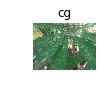

Tomato___mosaic_virus


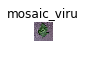

Cassava___cmd


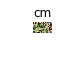

Cassava___healthy


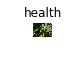

Tomato___Early_blight　


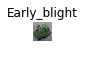

Tomato___Spider_mites_20Two-spotted_spider_mite


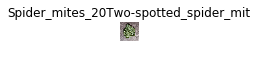

Cassava___cbsd


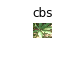

Tomato___Septoria_leaf_spot　


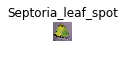

Tomato___Bacterial_spot　


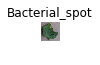

Cassava___cbb


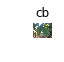

Tomato___healthy　


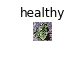

Tomato___Leaf_Mold


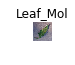

Tomato___Yellow_Leaf_Curl_Virus


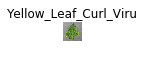

Tomato___Target_Spot　


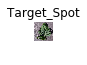

Tomato___Late_blight　


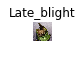

In [5]:
plt.figure(figsize=(20,20))

#visualize several images

parent_directory = "image"

for i, folder in enumerate(os.listdir(parent_directory)):
    print(folder)
    folder_directory = os.path.join(parent_directory,folder)
    files = os.listdir(folder_directory)
    #will inspect only 1 image per folder
    file = files[0] 
    file_path = os.path.join(folder_directory,file)
    
    image = imread(file_path)
    plt.subplot(10,15,i+1)
    plt.imshow(image)
    plt.axis("off")
    
    name = folder.split("___")[1][:-1]
    plt.title(name)
    plt.show()

In [6]:
#load everything into memory
x = []
y = []
class_names = []
parent_directory = "image"

for i,folder in enumerate(os.listdir(parent_directory)):
    print(i,folder)
    class_names.append(folder)
    folder_directory = os.path.join(parent_directory,folder)
    files = os.listdir(folder_directory)
    #will inspect only 1 image per folder
    for file in files:
        file_path = os.path.join(folder_directory,file)
        image = load_img(file_path,target_size=(64,64))
        image = img_to_array(image)/255.
        x.append(image)
        y.append(i)

x = np.array(x)
y = to_categorical(y)

0 Cassava___cgm
1 Tomato___mosaic_virus
2 Cassava___cmd
3 Cassava___healthy
4 Tomato___Early_blight　
5 Tomato___Spider_mites_20Two-spotted_spider_mite
6 Cassava___cbsd
7 Tomato___Septoria_leaf_spot　
8 Tomato___Bacterial_spot　
9 Cassava___cbb
10 Tomato___healthy　
11 Tomato___Leaf_Mold
12 Tomato___Yellow_Leaf_Curl_Virus
13 Tomato___Target_Spot　
14 Tomato___Late_blight　


In [7]:
#check the data shape
print(x.shape)
print(y.shape)
print(y[0])

(23816, 64, 64, 3)
(23816, 15)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
x_train, _x, y_train, _y = train_test_split(x,y,test_size=0.2, stratify = y, random_state = 1)
x_valid,x_test, y_valid, y_test = train_test_split(_x,_y,test_size=0.4, stratify = _y, random_state = 1)

print("train data:",x_train.shape,y_train.shape)
print("validation data:",x_valid.shape,y_valid.shape)
print("test data:",x_test.shape,y_test.shape)


train data: (19052, 64, 64, 3) (19052, 15)
validation data: (2858, 64, 64, 3) (2858, 15)
test data: (1906, 64, 64, 3) (1906, 15)


## Model Preparation

In [9]:
K.clear_session()

nfilter = 32


#VGG16 like model
model = Sequential([
    #block1
    layers.Conv2D(nfilter,(3,3),padding="same",name="block1_conv1",input_shape=(64,64,3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    #layers.Dropout(rate=0.2),   
    
    layers.Conv2D(nfilter,(3,3),padding="same",name="block1_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    #layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block1_pool"),
    
    #block2
    layers.Conv2D(nfilter*2,(3,3),padding="same",name="block2_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    #layers.Dropout(rate=0.2),
    
    layers.Conv2D(nfilter*2,(3,3),padding="same",name="block2_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    #layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block2_pool"),
    
    #block3
    layers.Conv2D(nfilter*2,(3,3),padding="same",name="block3_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    #layers.Dropout(rate=0.2),
    
    layers.Conv2D(nfilter*4,(3,3),padding="same",name="block3_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    #layers.Dropout(rate=0.2),
    
    layers.Conv2D(nfilter*4,(3,3),padding="same",name="block3_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    #layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block3_pool"),
    #layers.Flatten(),
    layers.GlobalAveragePooling2D(),
    
    #inference layer
    layers.Dense(128,name="fc1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    #layers.Dropout(rate=0.2),
    
    layers.Dense(128,name="fc2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),    
    #layers.Dropout(rate=0.2),
    
    layers.Dense(15,name="prepredictions"),
    layers.Activation("softmax",name="predictions")
    
])

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()
















Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32,

## Training

In [0]:
#utilize early stopping function to stop at the lowest validation loss
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
#utilize save best weight model during training
ckpt = ModelCheckpoint("PlantDiseaseCNNmodel.hdf5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [0]:
#we will define a generator class for training data and validation data seperately, as no augmentation is not required for validation data
t_gen = ImageDataGenerator(rotation_range=90,horizontal_flip=True)
v_gen = ImageDataGenerator()
train_gen = t_gen.flow(x_train,y_train,batch_size=98)
valid_gen = v_gen.flow(x_valid,y_valid,batch_size=98)

In [26]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch = train_gen.n // 98,
    callbacks = [es,ckpt], 
    validation_data = valid_gen,
    validation_steps = valid_gen.n // 98,
    
    epochs=50)

Epoch 1/50
194/194 [==============================] - 30s 157ms/step - loss: 0.1021 - acc: 0.9627 - val_loss: 0.7598 - val_acc: 0.8061

Epoch 00001: val_loss did not improve from 0.28387
Epoch 2/50
194/194 [==============================] - 30s 157ms/step - loss: 0.0944 - acc: 0.9635 - val_loss: 0.6480 - val_acc: 0.8163

Epoch 00002: val_loss did not improve from 0.28387
Epoch 3/50
194/194 [==============================] - 31s 159ms/step - loss: 0.0899 - acc: 0.9665 - val_loss: 0.4390 - val_acc: 0.8750

Epoch 00003: val_loss did not improve from 0.28387
Epoch 4/50
194/194 [==============================] - 31s 160ms/step - loss: 0.0938 - acc: 0.9644 - val_loss: 2.6494 - val_acc: 0.5225

Epoch 00004: val_loss did not improve from 0.28387
Epoch 5/50
194/194 [==============================] - 31s 160ms/step - loss: 0.0984 - acc: 0.9648 - val_loss: 0.4921 - val_acc: 0.8565

Epoch 00005: val_loss did not improve from 0.28387
Epoch 6/50
194/194 [==============================] - 30s 157ms/s

## Evaluation

In [0]:
#load the model weight file with lowest validation loss
model.load_weights("PlantDiseaseCNNmodel.hdf5")

In [0]:
#or can obtain the pretrained model from the github repo.

In [18]:
#check the model metrics
print(model.metrics_names)
#evaluate training data
print(model.evaluate(x= x_train, y = y_train))
#evaluate  validation data
print(model.evaluate(x= x_valid, y = y_valid))
#evaluate  test data
print(model.evaluate(x= x_test, y = y_test))      

['loss', 'acc']
19052/19052 [==============================] - 8s 443us/step
[0.1624380431642258, 0.9397438589249643]
2858/2858 [==============================] - 1s 466us/step
[0.2843156746582782, 0.913925822253324]
1906/1906 [==============================] - 1s 492us/step
[0.3083706770057068, 0.9087093386795188]


In [19]:
#draw a confusion matrix

#true label
y_true = np.argmax(y_test,axis=1)

#prediction label
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print(y_true)
print(y_pred)

[ 5  8  6 ...  5 12 12]
[ 5  8  0 ...  5 12 12]


Normalized confusion matrix
[[0.45 0.   0.35 0.06 0.   0.   0.13 0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   0.97 0.   0.   0.   0.   0.   0.03 0.   0.   0.   0.   0.   0.
  0.  ]
 [0.03 0.   0.9  0.   0.   0.   0.06 0.   0.   0.01 0.   0.   0.   0.
  0.  ]
 [0.12 0.   0.28 0.36 0.   0.   0.24 0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.01 0.   0.   0.   0.94 0.   0.   0.03 0.   0.   0.   0.   0.   0.
  0.03]
 [0.   0.   0.   0.   0.   0.92 0.   0.   0.   0.   0.01 0.03 0.03 0.01
  0.  ]
 [0.04 0.   0.16 0.01 0.   0.   0.75 0.   0.   0.03 0.   0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.
  0.01]
 [0.   0.   0.   0.   0.01 0.   0.   0.   0.97 0.   0.   0.   0.   0.01
  0.01]
 [0.11 0.   0.03 0.11 0.   0.   0.54 0.   0.   0.22 0.   0.   0.   0.
  0.  ]
 [0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.98 0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.97 0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   

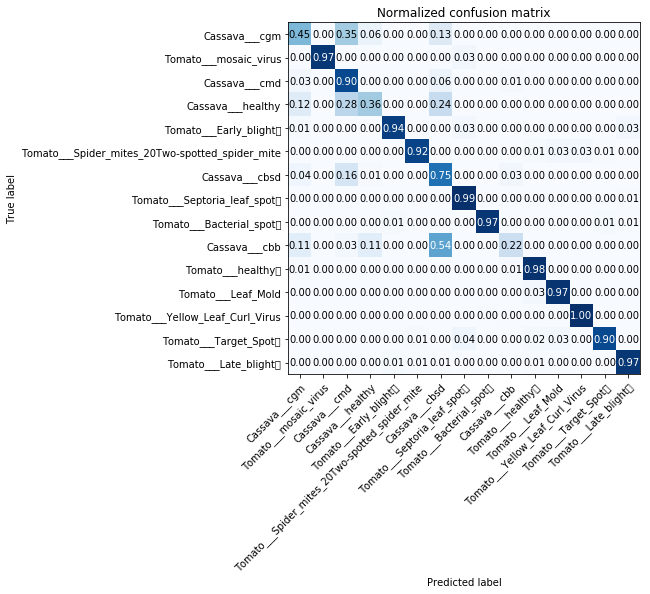

In [20]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(9,9))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')



## Predicting Indivisual Images

In [0]:
n = 30 #do not exceed (number of test image - 1)

plt.imshow(x_test[n])
plt.show()

true_label = np.argmax(y_test,axis=1)[n]
print("true_label is:",true_label,":",class_names[true_label])
prediction = model.predict(x_test[n][np.newaxis,...])[0]
print("predicted_value is:",prediction)
predicted_label = np.argmax(prediction)
print("predicted_label is:",predicted_label,":",class_names[predicted_label])

if true_label == predicted_label:
    print("correct prediction")
else:
    print("wrong prediction")